In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [8]:
# Load the datasets
train_df = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e10/sample_submission.csv")

In [9]:
print(train_df.isnull().sum())

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [14]:
# encode categorical var
categorical_cols = train_df.select_dtypes(include=['object']).columns
categorical_cols
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])

In [17]:
X = train_df.drop(['id', 'loan_status'], axis=1)
y = train_df['loan_status']

X_test = test_df.drop(['id'], axis=1)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# define model 
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [24]:
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

[0]	validation_0-auc:0.92047
[1]	validation_0-auc:0.92420
[2]	validation_0-auc:0.92583
[3]	validation_0-auc:0.92668
[4]	validation_0-auc:0.92647
[5]	validation_0-auc:0.92708
[6]	validation_0-auc:0.92768
[7]	validation_0-auc:0.92912
[8]	validation_0-auc:0.92895
[9]	validation_0-auc:0.92982
[10]	validation_0-auc:0.93091
[11]	validation_0-auc:0.93278
[12]	validation_0-auc:0.93293


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.93472
[14]	validation_0-auc:0.93440
[15]	validation_0-auc:0.93517
[16]	validation_0-auc:0.93699
[17]	validation_0-auc:0.93690
[18]	validation_0-auc:0.93722
[19]	validation_0-auc:0.93772
[20]	validation_0-auc:0.93771
[21]	validation_0-auc:0.93839
[22]	validation_0-auc:0.93936
[23]	validation_0-auc:0.93964
[24]	validation_0-auc:0.94053
[25]	validation_0-auc:0.94101
[26]	validation_0-auc:0.94127
[27]	validation_0-auc:0.94203
[28]	validation_0-auc:0.94192
[29]	validation_0-auc:0.94196
[30]	validation_0-auc:0.94227
[31]	validation_0-auc:0.94230
[32]	validation_0-auc:0.94255
[33]	validation_0-auc:0.94279
[34]	validation_0-auc:0.94395
[35]	validation_0-auc:0.94471
[36]	validation_0-auc:0.94523
[37]	validation_0-auc:0.94649
[38]	validation_0-auc:0.94744
[39]	validation_0-auc:0.94836
[40]	validation_0-auc:0.94853
[41]	validation_0-auc:0.94867
[42]	validation_0-auc:0.94908
[43]	validation_0-auc:0.95016
[44]	validation_0-auc:0.95021
[45]	validation_0-auc:0.95039
[46]	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred_val = xgb_model.predict_proba(X_val)[:,1]

roc_auc = roc_auc_score(y_val, y_pred_val)
print(f"Validation ROC AUC Score: {roc_auc:.4f}")


Validation ROC AUC Score: 0.9569


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2

In [43]:
test_pred = xgb_model.predict_proba(X_test)[:, 1]

sample_submission['loan_status'] = test_pred
sample_submission.to_csv('submission.csv', index=False)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

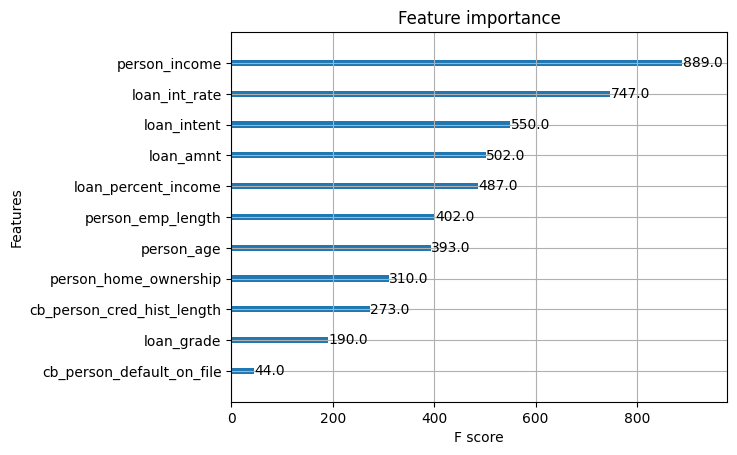

In [44]:
xgb.plot_importance(xgb_model)

In [45]:
xgb_model.feature_importances_

array([0.01228377, 0.05282006, 0.14866568, 0.03193499, 0.05630982,
       0.40830633, 0.02814273, 0.0489413 , 0.19494702, 0.00854939,
       0.00909891], dtype=float32)